In [1]:
library(Seurat)
library(Signac)
library(SeuratData)
library(biomaRt)
library(ggplot2)
library(BSgenome.Hsapiens.UCSC.hg38)

Attaching SeuratObject

Attaching sp

── Installed datasets ───────────────────────────────────── SeuratData v0.2.2 ──

✔ bmcite   0.3.0                        ✔ hcabm40k 3.0.0


────────────────────────────────────── Key ─────────────────────────────────────

✔ Dataset loaded successfully
❯ Dataset built with a newer version of Seurat than installed
❓ Unknown version of Seurat installed


Loading required package: BSgenome

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union

In [2]:
data = readRDS("../data/competition/train_seurat.rds")

metadata = read.csv('../data/competition/metadata.csv')
rownames(metadata) = metadata$cell_id
data = AddMetaData(data, metadata)

cell_types = read.csv('../data/competition/predicted_celltypes.csv')
rownames(cell_types) = cell_types$X
cell_types = cell_types['data.predicted.celltype']
colnames(cell_types) = 'predicted.celltype'
data = AddMetaData(data, cell_types)

## ATAC dimensionality

In [13]:
DefaultAssay(data) <- "ATAC"

data <- FindVariableFeatures(data, nfeatures=1000)
data <- FindTopFeatures(data, min.cutoff = '10')
data <- ScaleData(data)
data <- RunSVD(data, verbose=FALSE)
data <- RunPCA(data, verbose=FALSE, npcs=100)


Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”
Count slot empty

Centering and scaling data matrix



#### UMAP based on PCA:

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



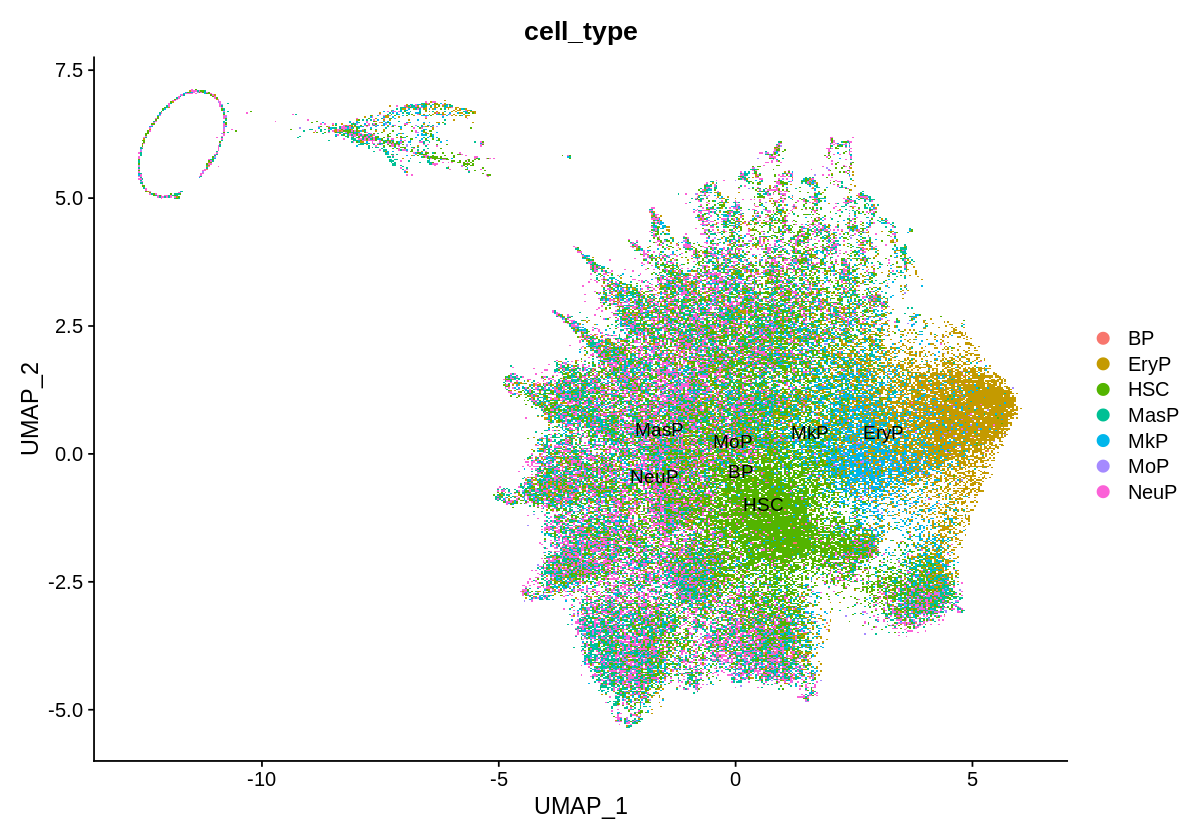

In [21]:
DefaultAssay(data) <- "ATAC"
data <- RunUMAP(data, reduction.name = "umap" , verbose=FALSE, reduction='pca', dims = 1:30)
options(repr.plot.width=10, repr.plot.height=7)
p2 <- DimPlot(data, reduction = 'umap', group.by = 'cell_type', label = TRUE, repel = TRUE)
p2

#### UMAP based on LSI:

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



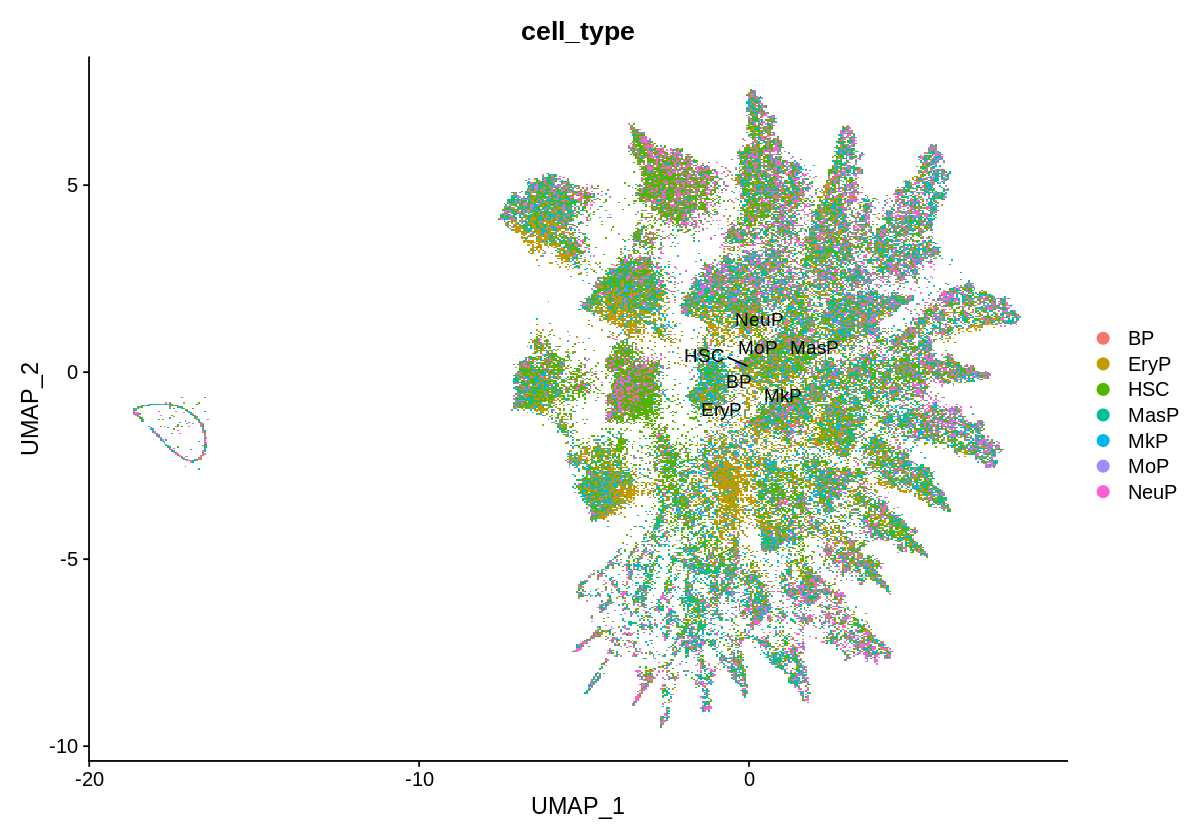

In [19]:
DefaultAssay(data) <- "ATAC"
data <- RunUMAP(data, reduction.name = "umap" , verbose=FALSE, reduction='lsi', dims = 2:30)


options(repr.plot.width=10, repr.plot.height=7)
p2 <- DimPlot(data, reduction = 'umap', group.by = 'cell_type', label = TRUE, repel = TRUE)
p2

In [28]:
data <- JackStraw(data, num.replicate = 10, dims=99)
data <- ScoreJackStraw(data, dims = 1:99)

Here below we look at the significance of PCs. 

The plot is described: "Significant PCs should show a p-value distribution (black curve) that is strongly skewed to the left compared to the null distribution (dashed line) The p-value for each PC is based on a proportion test comparing the number of genes with a p-value below a particular threshold (score.thresh), compared with the proportion of genes expected under a uniform distribution of p-values."

Warning message:
“Removed 849226 rows containing missing values (geom_point).”


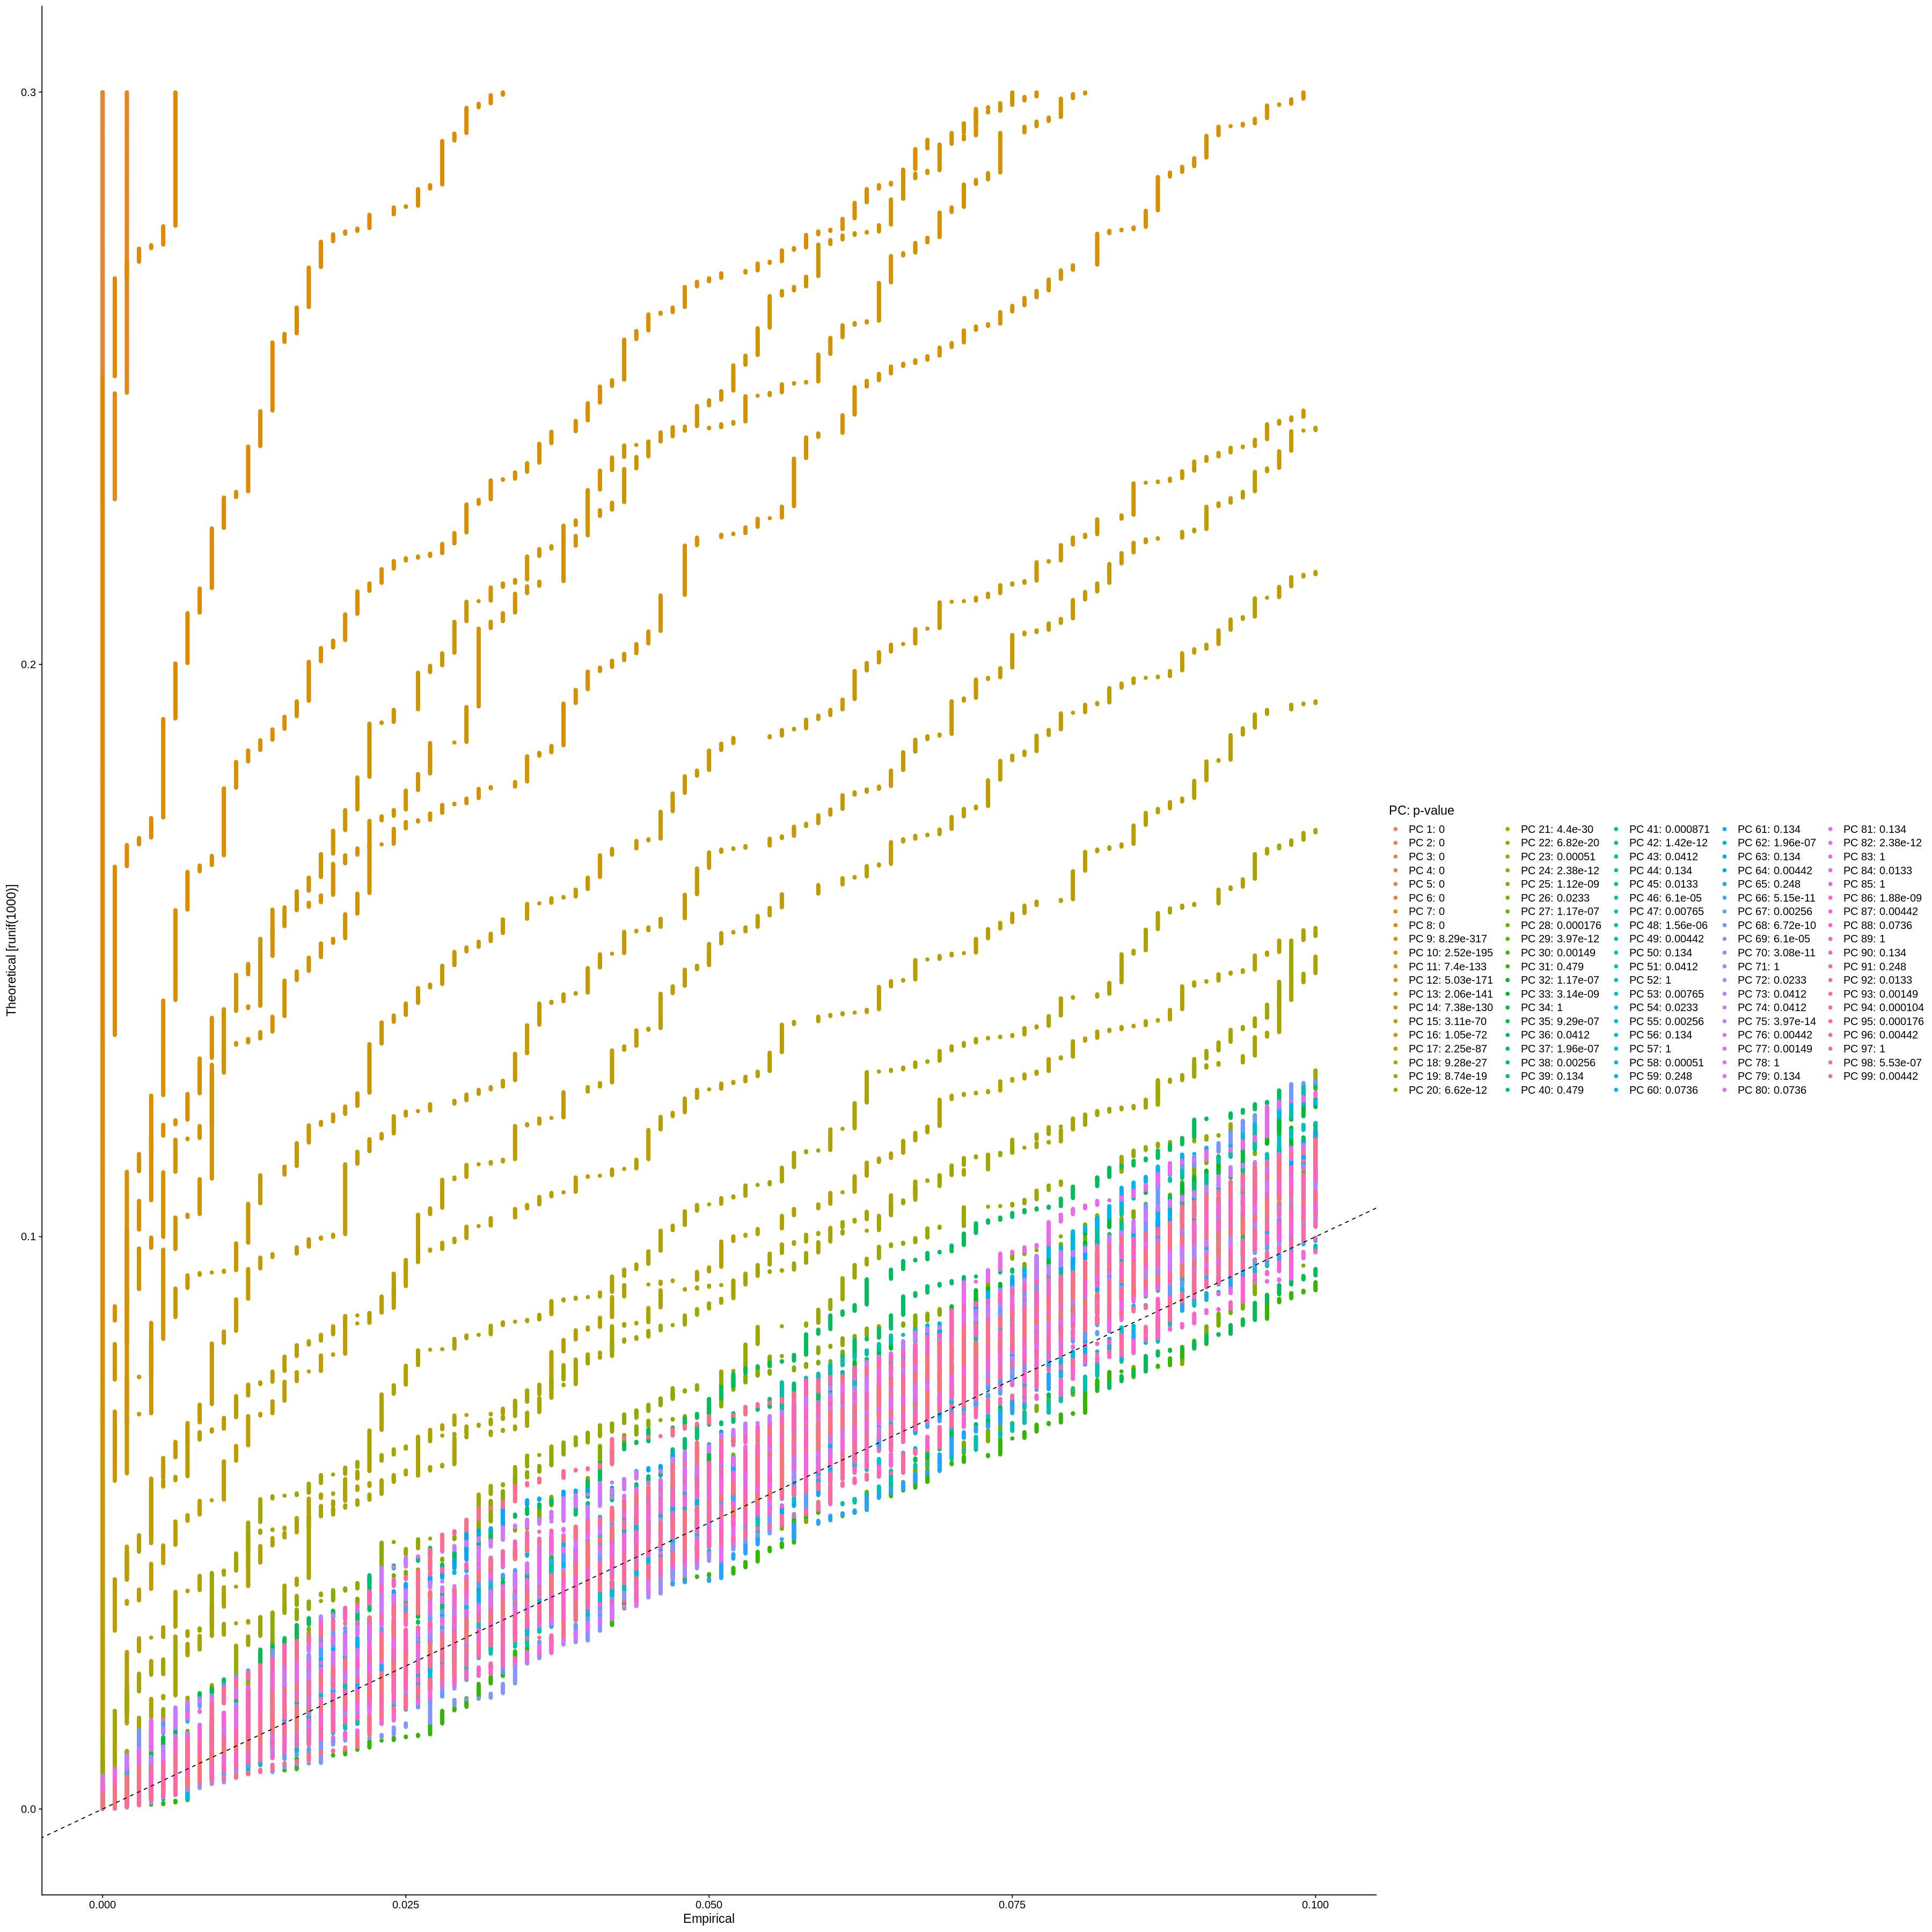

In [31]:
options(repr.plot.width=30, repr.plot.height=30)

JackStrawPlot(data, dims = 1:99)


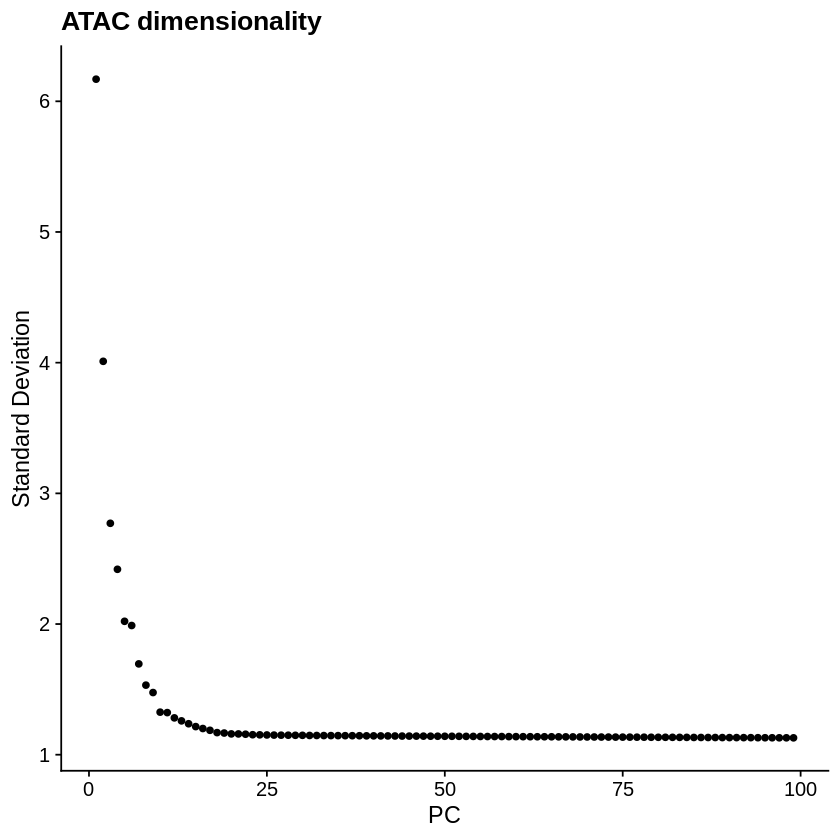

In [27]:
ElbowPlot(data, ndims=99) + ggtitle('ATAC dimensionality')


## Examine RNA dimensionality

In [4]:
DefaultAssay(data) <- "RNA"
data <- FindVariableFeatures(data)
data <- ScaleData(data)
data <- RunPCA(data, verbose=FALSE, npcs=100)


Centering and scaling data matrix



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



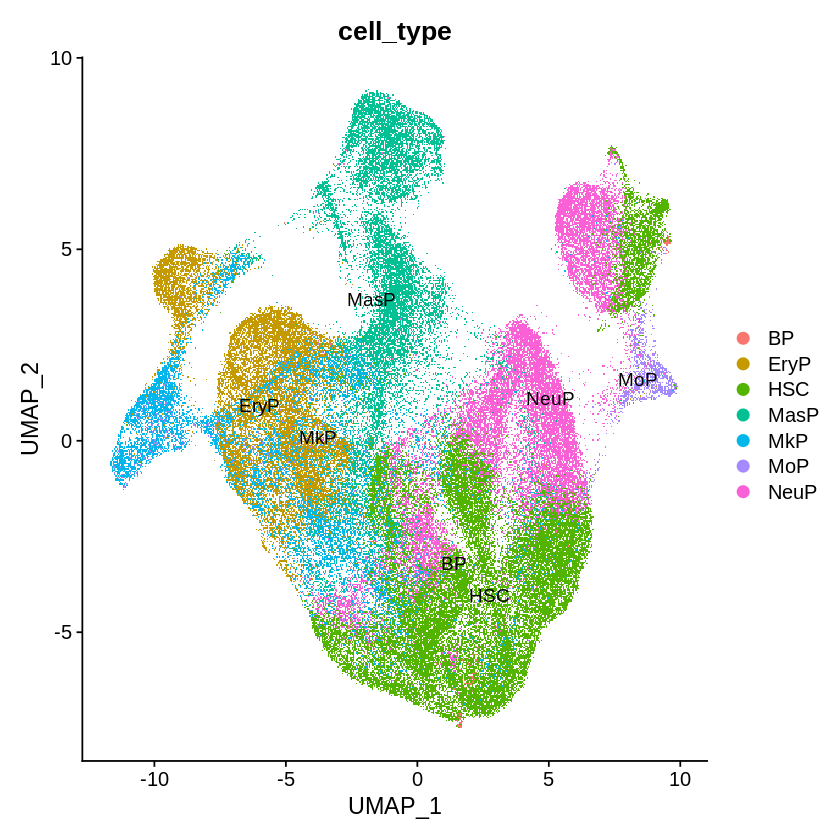

In [6]:
DefaultAssay(data) <- "RNA"
data <- RunUMAP(data, reduction.name = "umap" , verbose=FALSE, reduction='pca', dims = 1:30)
p2 <- DimPlot(data, reduction = 'umap', group.by = 'cell_type', label = TRUE, repel = TRUE)
p2

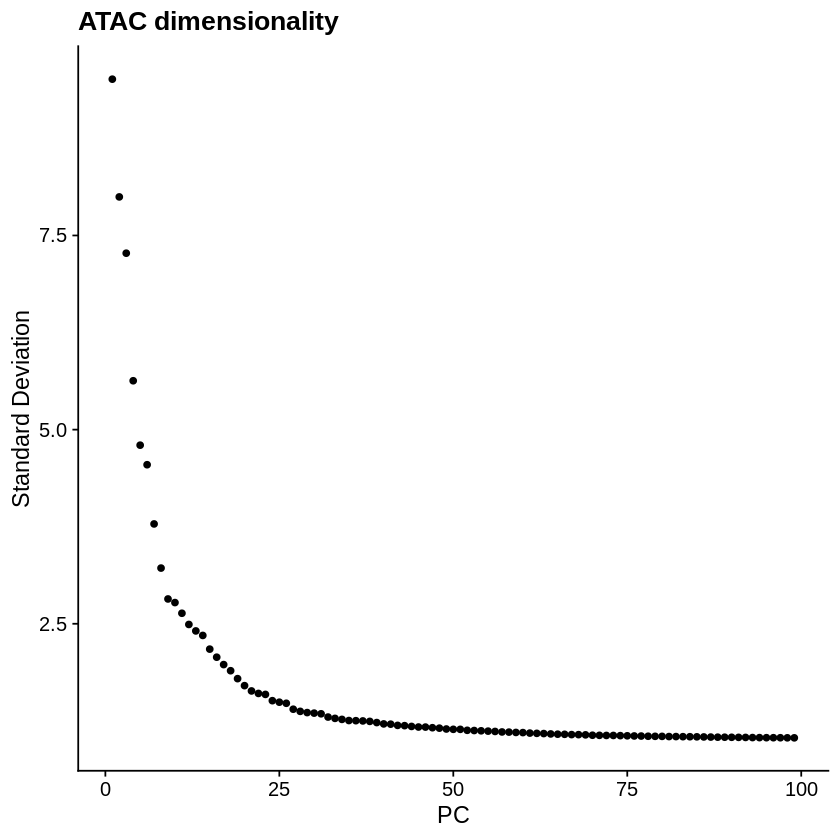

In [7]:
ElbowPlot(data, ndims=99) + ggtitle('RNA dimensionality')


In [ ]:
data <- JackStraw(data, num.replicate = 10, dims=99)
data <- ScoreJackStraw(data, dims = 1:99)



This is certainly odd:

Warning message:
“Removed 85861 rows containing missing values (geom_point).”


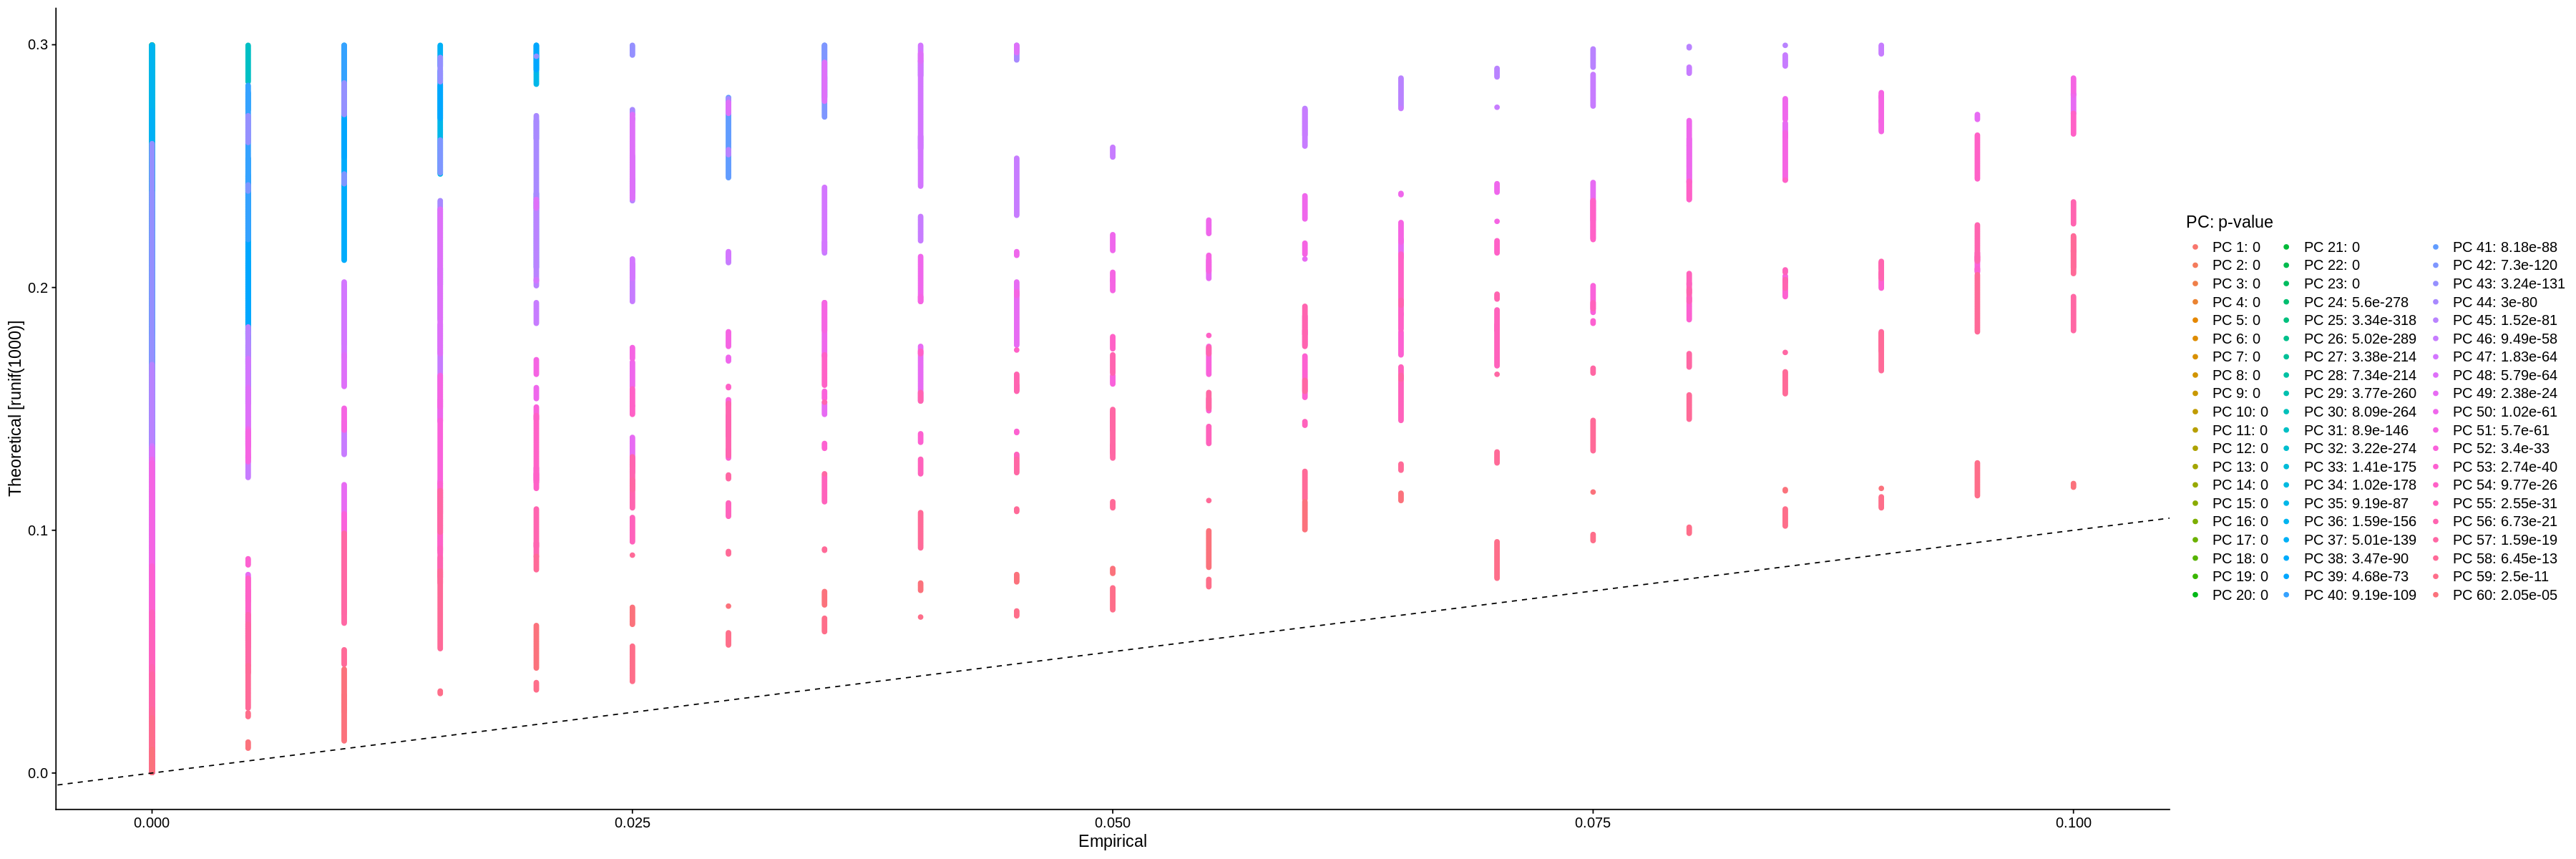

In [12]:
options(repr.plot.width=30, repr.plot.height=10)

JackStrawPlot(data, dims = 1:60)

It is as if RNA data was super multidimensional